# 動画・画像処理レッスン1
## 動画からの画像のサンプリング
by 石川晃平(aka konkon)  
e-mail: ishikawa@unno.material.nagoya-u.ac.jp

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import random
import os

from skimage.feature import peak_local_max
from skimage import data, img_as_float
from scipy import ndimage as ndi

import time
from tqdm import tqdm_notebook as tqdm

## 動画の読み込み
cv2.VideoCapture()を用いて動画を読みこむ。  
(参考: [動画を扱う — OpenCV-Python Tutorials 1 documentation](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_gui/py_video_display/py_video_display.html))

In [2]:
movie_path = '0.5%2.5μmPS_100Hz_8Vp-p_short_doublespeed.avi'
cap = cv2.VideoCapture(movie_path) # 動画パスを入力

## 動画のプロパティを表示

In [3]:
framerate = cap.get(cv2.CAP_PROP_FPS) # フレームレート
count = cap.get(cv2.CAP_PROP_FRAME_COUNT) # フレーム数
print('frame rate: '+str(framerate)+' fps')
print('frame counts: '+str(count))

frame rate: 29.97002997002997 fps
frame counts: 7207.0


## サンプリングするフレーム数を指定
今回は30フレームごとに1枚ずつサンプリングする。

In [4]:
sampling_rate = 30 #サンプリングする間隔
frame_numbers = [i*sampling_rate for i in range(int(count/sampling_rate)+1)]
print(frame_numbers)

[0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450, 480, 510, 540, 570, 600, 630, 660, 690, 720, 750, 780, 810, 840, 870, 900, 930, 960, 990, 1020, 1050, 1080, 1110, 1140, 1170, 1200, 1230, 1260, 1290, 1320, 1350, 1380, 1410, 1440, 1470, 1500, 1530, 1560, 1590, 1620, 1650, 1680, 1710, 1740, 1770, 1800, 1830, 1860, 1890, 1920, 1950, 1980, 2010, 2040, 2070, 2100, 2130, 2160, 2190, 2220, 2250, 2280, 2310, 2340, 2370, 2400, 2430, 2460, 2490, 2520, 2550, 2580, 2610, 2640, 2670, 2700, 2730, 2760, 2790, 2820, 2850, 2880, 2910, 2940, 2970, 3000, 3030, 3060, 3090, 3120, 3150, 3180, 3210, 3240, 3270, 3300, 3330, 3360, 3390, 3420, 3450, 3480, 3510, 3540, 3570, 3600, 3630, 3660, 3690, 3720, 3750, 3780, 3810, 3840, 3870, 3900, 3930, 3960, 3990, 4020, 4050, 4080, 4110, 4140, 4170, 4200, 4230, 4260, 4290, 4320, 4350, 4380, 4410, 4440, 4470, 4500, 4530, 4560, 4590, 4620, 4650, 4680, 4710, 4740, 4770, 4800, 4830, 4860, 4890, 4920, 4950, 4980, 5010, 5040, 5070, 5100, 5130, 5160, 

## フレーム数を指定して画像を読み込み

In [5]:
images = [] #画像を格納するリスト
for num in frame_numbers:
    #動画を読み込み
    cap.set(cv2.CAP_PROP_POS_FRAMES, num)
    ret,frame = cap.read()
    images.append(frame)

## 読み込んだ画像を表示
**注意**  
OpenCVでは、画像はRGB形式ではなくBGR形式で読み込まれます！  
なので、RGB形式で画像を取り扱うmatplotlibなどで描画すると色が変わります。

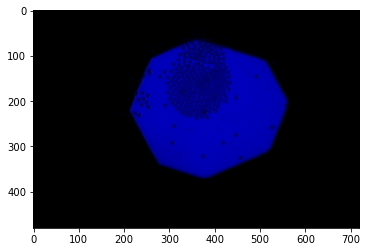

In [6]:
# サンプル画像を表示(色変換なし)
plt.imshow(images[0])

## BGR⇒RGBに色変換して画像を表示

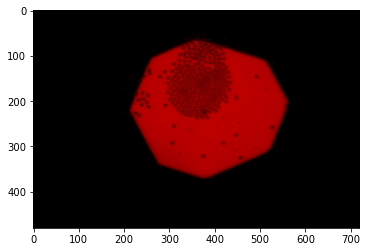

In [7]:
# BGR⇒RGBに色変換
img = cv2.cvtColor(images[0],cv2.COLOR_BGR2RGB)
# サンプル画像を表示
plt.imshow(img)

## 画像のトリミング
コロイドの部分が中心となるように画像をトリミングします。  
トリミング後の画像は正方形になるようにしてください。  
numpyのスライスを用います。  
(参照: [NumPy配列のスライシング機能の使い方](https://deepage.net/features/numpy-slicing.html))

In [8]:
images_trim = [] #トリミング画像を格納するリスト
xlim = [250,500] # トリミング範囲(X軸方向)
ylim = [60,310] # トリミング範囲(Y軸方向)
for img in images:
    img = img[ylim[0]:ylim[1],xlim[0]:xlim[1]]
    images_trim.append(img)
#     cv2.imwrite('./sample/frame'+str(num).zfill(4)+'.png',frame)

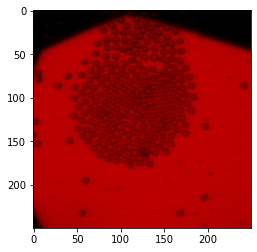

In [9]:
# BGR⇒RGBに色変換
img = cv2.cvtColor(images_trim[0],cv2.COLOR_BGR2RGB)
# サンプル画像を表示
plt.imshow(img)

## サンプリングした画像を保存
./sample/frameXXXX.pngとして保存します。

In [10]:
#ディレクトリの作製
try:
    os.mkdir('./sample')
except:
    print('Directory already exist.')

Directory already exist.


In [11]:
#画像をpng形式で保存
for n,img in enumerate(images_trim):
    cv2.imwrite('./sample/frame'+str(frame_numbers[n]).zfill(4)+'.png',img)